<a href="https://colab.research.google.com/github/jonathjd/Education-Project/blob/main/2_0_jd_initial_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
# read in data
df = pd.read_csv("/selected_columns.csv")

In [3]:
# check data
df

,Unnamed: 0,UNITID,INSTNM,CITY,STABBR,ZIP,INSTURL,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PUB,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL
0,0,100654,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,4,1,5,23053.0,10024.0,18634.0,14990.0,NaN,7870.0,5546.0,7709.0
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu/,4,1,5,24495.0,8568.0,20400.0,16953.0,NaN,12096.0,14983.0,11049.0
2,2,100690,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu/,4,2,5,14800.0,6950.0,6950.0,NaN,8705.0,16403.0,5245.0,4187.0
3,3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu/,4,1,5,23917.0,11122.0,23518.0,15860.0,NaN,8275.0,8488.0,9688.0
4,4,100724,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu/,4,1,5,21866.0,11068.0,19396.0,13650.0,NaN,9587.0,9346.0,7221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,6689,48511113,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,0,1,5,NaN,6165.0,NaN,NaN,NaN,NaN,NaN,NaN
6690,6690,48616901,American College of Barbering - Florence,Florence,KY,410421801,NaN,0,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6691,6691,49005401,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,0,3,5,NaN,19404.0,NaN,NaN,NaN,NaN,NaN,NaN
6692,6692,49146401,ABC Adult School - Cabrillo Lane,Cerritos,CA,907037748,NaN,0,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# when exporting, need to export without the index, for now, drop index
df.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,INSTURL,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PUB,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL
0,100654,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,4,1,5,23053.0,10024.0,18634.0,14990.0,NaN,7870.0,5546.0,7709.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu/,4,1,5,24495.0,8568.0,20400.0,16953.0,NaN,12096.0,14983.0,11049.0
2,100690,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu/,4,2,5,14800.0,6950.0,6950.0,NaN,8705.0,16403.0,5245.0,4187.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu/,4,1,5,23917.0,11122.0,23518.0,15860.0,NaN,8275.0,8488.0,9688.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu/,4,1,5,21866.0,11068.0,19396.0,13650.0,NaN,9587.0,9346.0,7221.0


# Drop data that is not relevant
We are going to limit the data to the following criteria:
1. The institution grants an associates degree or higher: **HIGHDEG** (rows < 2)
2. Outlying Areas will be dropped: **REGION** (rows==9)

In [6]:
# grab all rows that are in the outlying regions
reg9 = df[df["REGION"]==9]

In [7]:
# Drop them
df.drop(reg9.index, inplace=True)

In [8]:
# Check shape
df.shape

(6540, 17)

In [9]:
# Grab all the rows that have a highdeg of less than 2
deg = df[df["HIGHDEG"]<2]

In [10]:
# Drop them
df.drop(deg.index, inplace=True)

In [11]:
# Check shape
df.shape

(3946, 17)

# Now we that we have the rows we want to work with, we can begin cleaning

In [12]:
# Check for null values
df.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
INSTURL              0
HIGHDEG              0
CONTROL              0
REGION               0
COSTT4_A           777
TUITIONFEE_IN      651
TUITIONFEE_OUT     651
NPT4_PUB          2392
NPT4_PRIV         2103
TUITFTE              6
INEXPFTE             6
AVGFACSAL          156
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf268ddc90>,
      dtype=object)

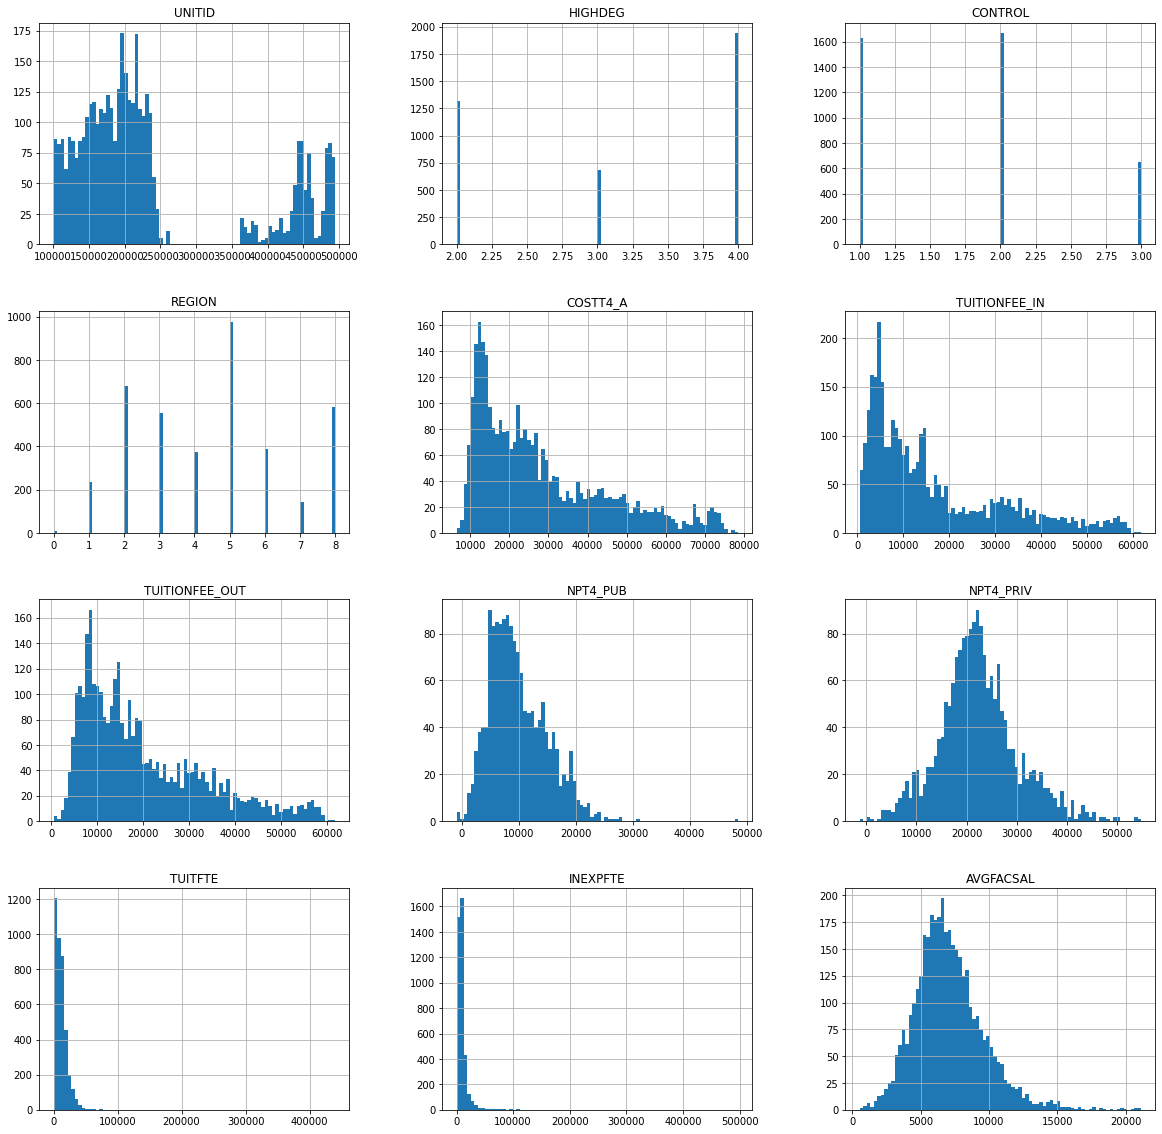

In [13]:
# check for outliers
df.hist(bins=80, figsize=(20,20))

### Some quick insights:
- Unfortunately, we have a lot of null values *(~2,200/4,000)* in average net price of public and private universities.
- 777/4,000 values are null for cost of attendance.

### Plan to clean data:
- Average net price will be dropped because of the amount of null data
- We will impute the data with the median of variables because the data seems to be positiviely skewed
- We're going to create subsets of the data depending on the whether the institution primarily grants **associates**, **bachelors**, or **graduate** degrees
- Find the **median** and impute the values, then join the subset back to the original dataframe

In [14]:
# Drop data with too many missing values
df.drop(["NPT4_PRIV","NPT4_PUB"], axis=1, inplace=True)

In [18]:
cost_median = df["COSTT4_A"].median()
intuition_median = df["TUITIONFEE_IN"].median()
outtuition_median = df['TUITIONFEE_OUT'].median()
avgfacsal_median = df['AVGFACSAL'].median()

In [19]:
df['COSTT4_A'].fillna(cost_median, inplace=True)
df['TUITIONFEE_IN'].fillna(intuition_median, inplace=True)
df['TUITIONFEE_OUT'].fillna(outtuition_median, inplace=True)
df['AVGFACSAL'].fillna(avgfacsal_median, inplace=True)

In [20]:
df.isna().sum()

UNITID            0
INSTNM            0
CITY              0
STABBR            0
ZIP               0
INSTURL           0
HIGHDEG           0
CONTROL           0
REGION            0
COSTT4_A          0
TUITIONFEE_IN     0
TUITIONFEE_OUT    0
TUITFTE           6
INEXPFTE          6
AVGFACSAL         0
dtype: int64

In [22]:
tuitfte_median = df['TUITFTE'].median()
inexpfte_median = df['INEXPFTE'].median()

In [23]:
df['TUITFTE'].fillna(tuitfte_median, inplace=True)
df['INEXPFTE'].fillna(inexpfte_median, inplace=True)

In [26]:
df.isna().sum()

UNITID            0
INSTNM            0
CITY              0
STABBR            0
ZIP               0
INSTURL           0
HIGHDEG           0
CONTROL           0
REGION            0
COSTT4_A          0
TUITIONFEE_IN     0
TUITIONFEE_OUT    0
TUITFTE           0
INEXPFTE          0
AVGFACSAL         0
dtype: int64

In [29]:
# Lets export this dataset as a CSV to clean further later
df.to_csv("cleaned_data.csv", index=False)

In [30]:
# export data for further analysis
from google.colab import files
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>